# Strategic Thinking Final CA3 - Capstone Project 

##  Optimising Sales Performance for a US Candy Distributor

Github Link : https://github.com/CCT-Dublin/ca1-capstone-project-proposal-Aline-Menezes-Silva

## Problem Description

A US-based candy distributor struggles to maximise sales and profits due to inefficient logistics, uneven regional performance, and unclear demand patterns. By analysing customer locations, factory shipments, sales orders, and product details, this project will identify key opportunities to improve revenue—such as predicting demand more accurately, targeting high-value customer groups, and optimising delivery routes to reduce costs. The goal is to provide actionable insights that enhance sales performance while cutting unnecessary expenses.

## Data Description

- US Candy Distributor: 
The dataset includes Sales and geospatial factory to customer shipment data for a US national candy distributor, inlcuding information around customer & factory locations, sales orders & goals and product details.

- Candy_Products.csv
- Candy_Sales.csv


## Data Dictionary 

Most of the fields are self-explanatory.

- Row ID = Unique row identifier
- Order ID = Unique order identifier
- Order Date = Date of order
- Ship Date = Date of shipment
- Ship Mode = Shipping method of order
- Customer ID = Unique customer identifier
- Country/Region = Country or region of customer
- City = City of customer
- State/Province = State/province of customer
- Postal Code = Postal code / zip code of customer
- Division = Product division
- Region = Region of customer
- Product ID = Unique product identifier
- Product Name = Product long name
- Sales = otal sales value of order
- Units = Total units of order
- Gross = Profit	Gross profit of order ( Sales - Cost )
- Cost = Cost to manufacture
- Factory = Factory Name


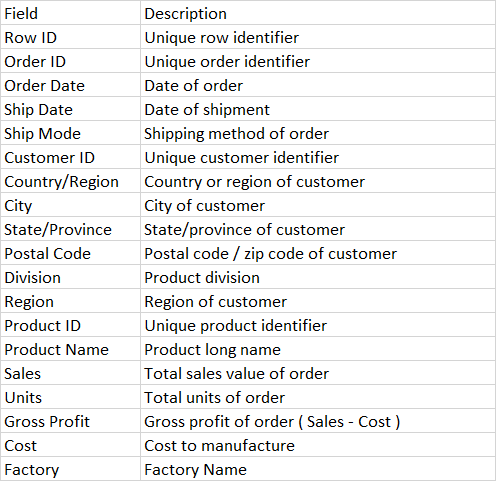

## Loading Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

!pip install notebook
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
pd.set_option('display.max_columns', None)  

In [3]:
candy_products = pd.read_csv("Candy_Products.csv")
candy_products.head(5)

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30


In [4]:
candy_sales = pd.read_csv("Candy_Sales.csv")
candy_sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,1,US-2021-103800-CHO-MIL-31000,3 01 2021,30 01 2021,Standard Class,103800,United States,Houston,Texas,77095,Chocolate,Interior,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28
1,4,US-2021-112326-CHO-SCR-58000,4 01 2021,1 02 2021,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,10.80,3,7.50,3.30
2,3,US-2021-112326-CHO-NUT-13000,4 01 2021,1 02 2021,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,10.47,3,7.47,3.00
3,2,US-2021-112326-CHO-TRI-54000,4 01 2021,1 02 2021,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
4,5,US-2021-141817-CHO-TRI-54000,5 01 2021,5 02 2021,Standard Class,141817,United States,Philadelphia,Pennsylvania,19143,Chocolate,Atlantic,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,11.25,3,7.35,3.90


## Merging the Datasets

In [5]:
#Merging The Sales and Products Datasets based on Product ID (to extract the Factory Name)

candy_df = pd.merge(candy_products, candy_sales, how='left', on='Product ID')
candy_df.head(5)

,Division_x,Product Name_x,Factory,Product ID,Unit Price,Unit Cost,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division_y,Region,Product Name_y,Sales,Units,Gross Profit,Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,3,US-2021-112326-CHO-NUT-13000,4 01 2021,1 02 2021,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,Wonka Bar - Nutty Crunch Surprise,10.47,3,7.47,3.0
1,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,9,US-2021-167199-CHO-NUT-13000,6 01 2021,3 02 2021,Standard Class,167199,United States,Henderson,Kentucky,42420,Chocolate,Gulf,Wonka Bar - Nutty Crunch Surprise,6.98,2,4.98,2.0
2,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,23,US-2021-109232-CHO-NUT-13000,13 01 2021,9 02 2021,Second Class,109232,United States,Mount Pleasant,South Carolina,29464,Chocolate,Gulf,Wonka Bar - Nutty Crunch Surprise,20.94,6,14.94,6.0
3,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,31,US-2021-157147-CHO-NUT-13000,13 01 2021,11 02 2021,Standard Class,157147,United States,San Francisco,California,94109,Chocolate,Pacific,Wonka Bar - Nutty Crunch Surprise,17.45,5,12.45,5.0
4,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,39,US-2021-123477-CHO-NUT-13000,18 01 2021,14 02 2021,Second Class,123477,United States,Springfield,Oregon,97477,Chocolate,Pacific,Wonka Bar - Nutty Crunch Surprise,13.96,4,9.96,4.0


In [6]:
# Dropping dup columns(keeping sales dataset versions)

candy_df = candy_df.drop(['Division_y', 'Product Name_y','Unit Price', 'Unit Cost'], axis=1)

# Renaming columns

candy_df = candy_df.rename(columns={
    'Division_x': 'Division',
    'Product Name_x': 'Product Name'
})

#### Columns That Will Be Dropped:

- Row_ID - appears to be an auto-incremented index column.

- Order_ID - this is just a unique identifier without analytical value.(It will be dropped after identifying dup in the dataaet)

- Postal_Code - already have City or State_Province, postal codes may not add meaningful insights unless you’re doing hyper-local analysis.

- City - it might overlap with State/Province and Country or each other. 

- Product_ID - Product_Name is already descriptive. 



In [7]:
candy_df.drop(columns=['Row ID', 'Order ID', 'Postal Code', 'City', 'Product ID' ], inplace=True)

#### renaming Remain Columns:

In [8]:
newc = {
    'State/Province': 'State',
    'Product Name': 'Product_Name',
    'Order Date': 'Order_Date',
    'Ship Date': 'Ship_Date',
    'Ship Mode': 'Ship_Mode',
    'Customer ID': 'Customer_ID',
    'Gross Profit': 'Gross_Profit',
    'Country/Region': 'Country'
}

# Rename the columns
candy_df.rename(columns=newc, inplace=True)

## Analysing the Dataset

In [9]:
candy_df.head(5)

,Division,Product_Name,Factory,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country,State,Region,Sales,Units,Gross_Profit,Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,4 01 2021,1 02 2021,Standard Class,112326,United States,Illinois,Interior,10.47,3,7.47,3.0
1,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,6 01 2021,3 02 2021,Standard Class,167199,United States,Kentucky,Gulf,6.98,2,4.98,2.0
2,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,13 01 2021,9 02 2021,Second Class,109232,United States,South Carolina,Gulf,20.94,6,14.94,6.0
3,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,13 01 2021,11 02 2021,Standard Class,157147,United States,California,Pacific,17.45,5,12.45,5.0
4,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,18 01 2021,14 02 2021,Second Class,123477,United States,Oregon,Pacific,13.96,4,9.96,4.0


In [10]:
candy_df.shape

(10194, 14)

In [11]:
#Checking Null Values

candy_df.isnull().sum()

Division        0
Product_Name    0
Factory         0
Order_Date      0
Ship_Date       0
Ship_Mode       0
Customer_ID     0
Country         0
State           0
Region          0
Sales           0
Units           0
Gross_Profit    0
Cost            0
dtype: int64

All columns have 10,194 non-null entries - No missing values.

In [12]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Division      10194 non-null  object 
 1   Product_Name  10194 non-null  object 
 2   Factory       10194 non-null  object 
 3   Order_Date    10194 non-null  object 
 4   Ship_Date     10194 non-null  object 
 5   Ship_Mode     10194 non-null  object 
 6   Customer_ID   10194 non-null  int64  
 7   Country       10194 non-null  object 
 8   State         10194 non-null  object 
 9   Region        10194 non-null  object 
 10  Sales         10194 non-null  float64
 11  Units         10194 non-null  int64  
 12  Gross_Profit  10194 non-null  float64
 13  Cost          10194 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


### Dataset Structure

- Rows: 10,194 orders

- Columns: 19 (mix of categorical and numerical)

Key Columns:

- Sales: Revenue per order

- Units: Quantity sold

- Gross Profit: Sales minus cost

- Geographic: Region, State/Province, City

- Product: Product Name, Factory, Division

- Time: Order Date, Ship Date

In [13]:
candy_df['Order_Date'] = pd.to_datetime(candy_df['Order_Date'], dayfirst=True)
candy_df['Ship_Date'] = pd.to_datetime(candy_df['Ship_Date'], dayfirst=True)

In [14]:
# Check for Duplicates

dup = candy_df.duplicated().sum()
print(f"Number of duplicated rows: {dup}")


Number of duplicated rows: 313


In [15]:
duplicated = candy_df[candy_df.duplicated(keep='first')]
duplicated

,Division,Product_Name,Factory,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country,State,Region,Sales,Units,Gross_Profit,Cost
9,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,2021-01-30,2021-02-28,Standard Class,134103,United States,Michigan,Interior,6.98,2,4.98,2.0
70,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,2021-04-25,2021-05-21,Standard Class,166954,United States,California,Pacific,17.45,5,12.45,5.0
119,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,2021-07-14,2021-08-08,Standard Class,164182,United States,Pennsylvania,Atlantic,6.98,2,4.98,2.0
122,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,2021-07-15,2021-08-09,Standard Class,115980,United States,South Dakota,Interior,10.47,3,7.47,3.0
148,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,2021-08-12,2021-09-06,Standard Class,156244,United States,Florida,Gulf,20.94,6,14.94,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,2024-11-03,2024-11-30,Standard Class,100622,United States,Florida,Gulf,7.50,2,4.90,2.6
9683,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,2024-11-12,2024-12-10,Standard Class,122644,United States,Ohio,Atlantic,7.50,2,4.90,2.6
9722,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,2024-11-24,2024-12-24,Standard Class,168641,United States,New York,Atlantic,7.50,2,4.90,2.6
9774,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,2024-12-07,2025-01-04,Standard Class,135587,United States,Mississippi,Gulf,15.00,4,9.80,5.2


In [16]:
candy_df_drop = candy_df.drop_duplicates()
remaining_duplicates = candy_df_drop.duplicated().sum()
print(f"Duplicates remaining after drop: {remaining_duplicates}")


Duplicates remaining after drop: 0


### Feature Engineering

In [17]:
# Order Processing Time:

candy_df['Processing_Time'] = (candy_df['Ship_Date'] - candy_df['Order_Date']).dt.days

In [18]:
# Profit Margin:

candy_df['Profit_Margin'] = (candy_df['Gross_Profit'] / candy_df['Sales']) * 100

In [19]:
candy_df.tail(5)

,Division,Product_Name,Factory,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country,State,Region,Sales,Units,Gross_Profit,Cost,Processing_Time,Profit_Margin
10189,Other,Kazookles,The Other Factory,2024-11-02,2024-11-27,Second Class,163790,United States,California,Pacific,9.75,3,0.75,9.0,25,7.692308
10190,Other,Kazookles,The Other Factory,2024-11-06,2024-11-29,Same Day,153948,United States,California,Pacific,13.00,4,1.00,12.0,23,7.692308
10191,Other,Kazookles,The Other Factory,2024-11-30,2024-12-26,First Class,107314,United States,California,Pacific,9.75,3,0.75,9.0,26,7.692308
10192,Other,Kazookles,The Other Factory,2024-12-08,2025-01-04,Second Class,117926,United States,California,Pacific,3.25,1,0.25,3.0,27,7.692308
10193,Other,Kazookles,The Other Factory,2024-12-16,2025-01-12,Second Class,137463,United States,California,Pacific,16.25,5,1.25,15.0,27,7.692308


## Summary Statastics 

In [20]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Division         10194 non-null  object        
 1   Product_Name     10194 non-null  object        
 2   Factory          10194 non-null  object        
 3   Order_Date       10194 non-null  datetime64[ns]
 4   Ship_Date        10194 non-null  datetime64[ns]
 5   Ship_Mode        10194 non-null  object        
 6   Customer_ID      10194 non-null  int64         
 7   Country          10194 non-null  object        
 8   State            10194 non-null  object        
 9   Region           10194 non-null  object        
 10  Sales            10194 non-null  float64       
 11  Units            10194 non-null  int64         
 12  Gross_Profit     10194 non-null  float64       
 13  Cost             10194 non-null  float64       
 14  Processing_Time  10194 non-null  int64

#### Data Overview After Cleaning and preprocessing the dataset:

Dataset Summary
Rows: 10194

Columns: 16 (mix of categorical & numeric)

Time Range: Likely ~3-4 years (1,242 unique order dates).

Key Columns:
Sales Metrics: Sales, Units, Gross_Profit, Cost, Profit_Margin.

Geospatial: Country, State, Region.

Temporal: Order_Date, Ship_Date, Processing_Time.

Product/Operations: Product_Name, Factory, Ship_Mode.

In [21]:
# number of unique values per column

unique = candy_df.nunique()

print("Number of unique values in each column:")
print(unique)

Number of unique values in each column:
Division              3
Product_Name         15
Factory               5
Order_Date         1242
Ship_Date          1306
Ship_Mode             4
Customer_ID        5044
Country               2
State                59
Region                4
Sales                88
Units                14
Gross_Profit        121
Cost                 95
Processing_Time      18
Profit_Margin        18
dtype: int64


In [22]:
candy_df[['Sales', 'Units', 'Gross_Profit', 'Cost', 'Processing_Time', 'Profit_Margin']].describe()

,Sales,Units,Gross_Profit,Cost,Processing_Time,Profit_Margin
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,13.908537,3.791838,9.166451,4.742087,25.608986,66.514045
std,11.341020,2.228317,6.643740,5.061647,2.182119,6.721012
min,1.250000,1.000000,0.250000,0.600000,15.000000,7.692308
25%,7.200000,2.000000,4.900000,2.400000,24.000000,65.333333
50%,10.800000,3.000000,7.470000,3.600000,26.000000,66.666667
75%,18.000000,5.000000,12.250000,5.700000,27.000000,69.444444
max,260.000000,14.000000,130.000000,130.000000,34.000000,80.000000


In [23]:
candy_df.describe(include= object)

,Division,Product_Name,Factory,Ship_Mode,Country,State,Region
count,10194,10194,10194,10194,10194,10194,10194
unique,3,15,5,4,2,59,4
top,Chocolate,Wonka Bar - Milk Chocolate,Lot's O' Nuts,Standard Class,United States,California,Pacific
freq,9844,2137,5692,6120,9994,2001,3253


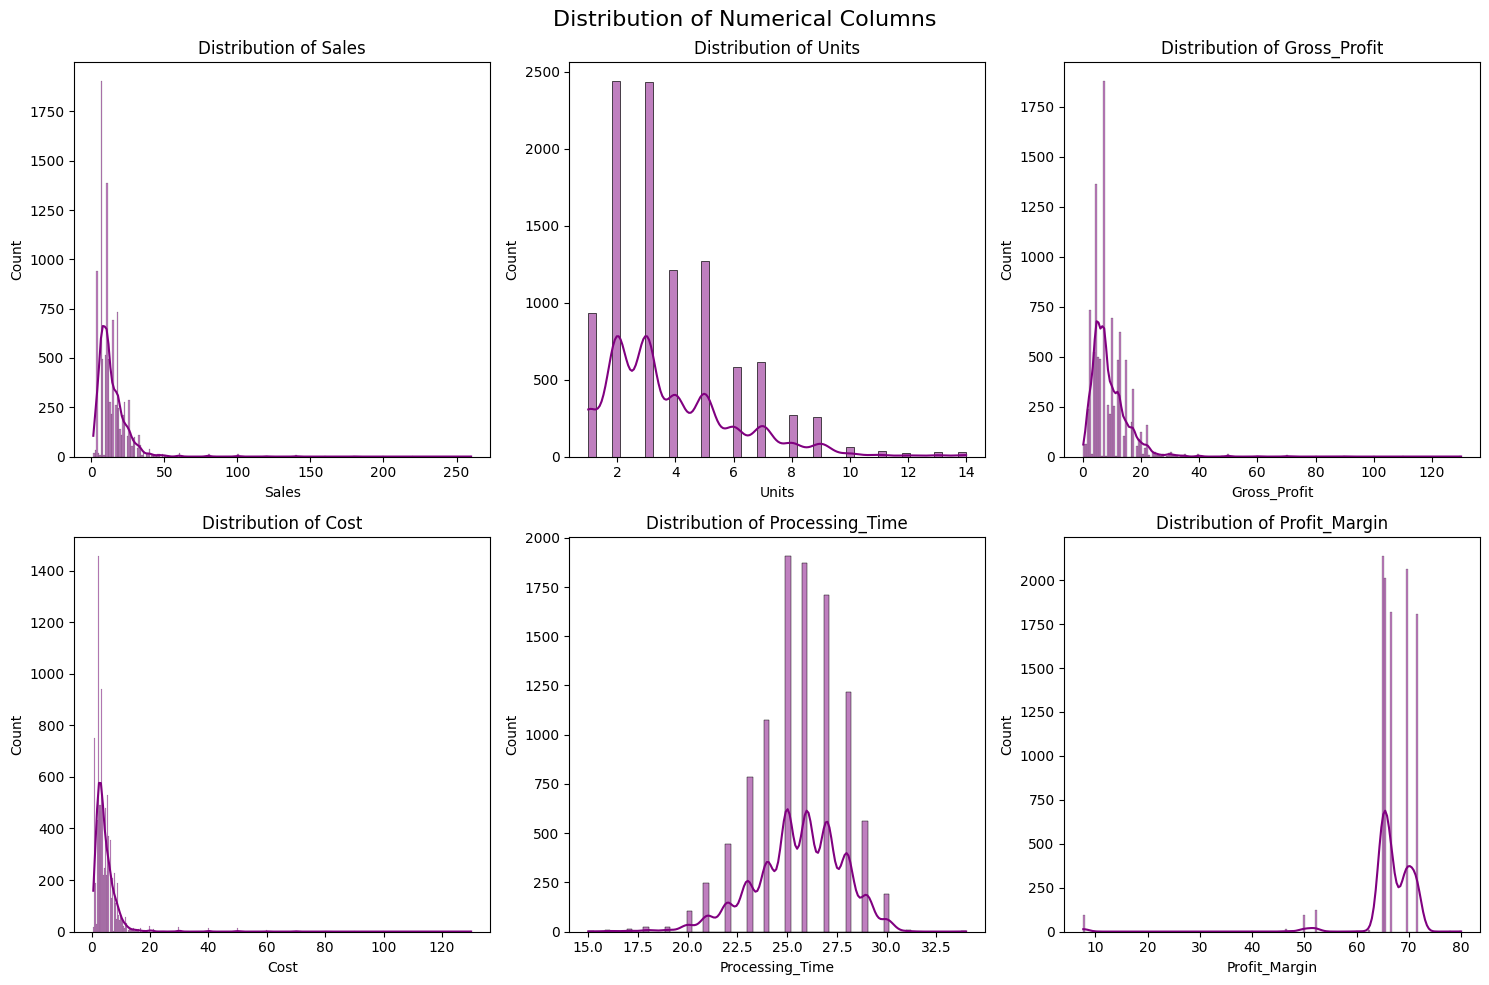

In [24]:
columns = ['Sales', 'Units', 'Gross_Profit', 'Cost', 'Processing_Time', 'Profit_Margin']
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Columns', fontsize=16)

# Plot distributions (histograms + KDE)
for i, col in enumerate(columns):
    sns.histplot(candy_df[col], kde=True, ax=axes[i//3, i%3], color='purple')
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Box Plots (Check for Outliers)

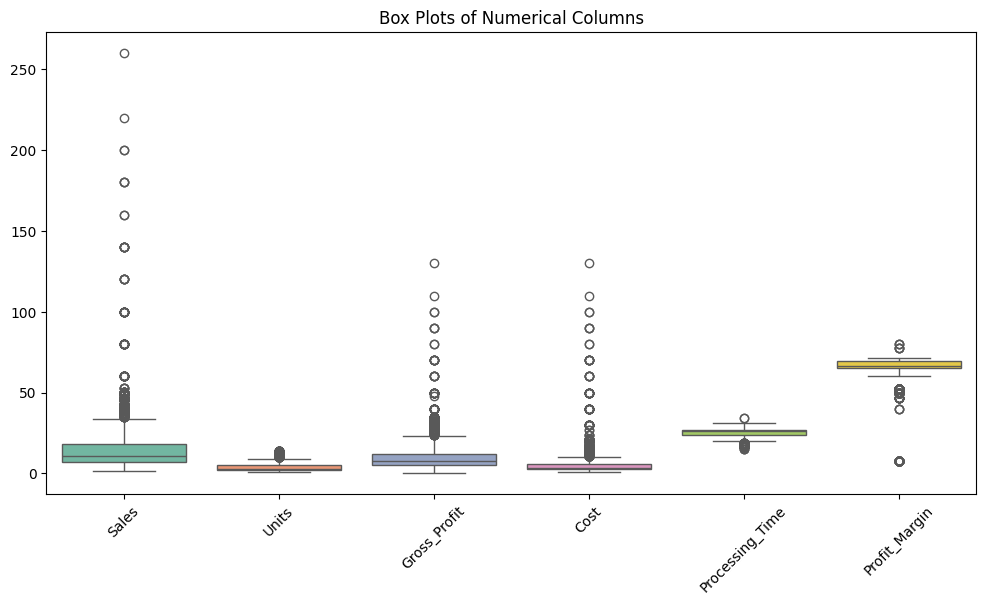

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=candy_df[columns], palette='Set2')
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

## Exploratory Data Analysis (EDA)

#### Sales Distribution:

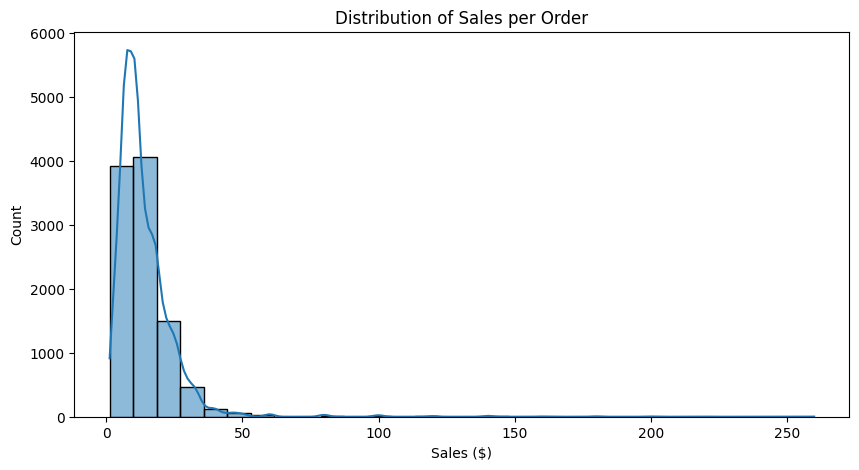

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(candy_df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales per Order')
plt.xlabel('Sales ($)')
plt.show()

#### Sales Over Time - Monthly/Quarterly Sales Trends

In [27]:
# Resample by month
monthly_sales = candy_df.resample('M', on='Order_Date')['Sales'].sum()
monthly_sales 

Order_Date
2021-01-31    1065.24
2021-02-28     547.09
2021-03-31    2245.63
2021-04-30    2058.97
2021-05-31    1855.21
2021-06-30    1838.43
2021-07-31    1908.23
2021-08-31    2258.46
2021-09-30    3927.08
2021-10-31    2544.88
2021-11-30    4357.18
2021-12-31    4347.15
2022-01-31    1028.66
2022-02-28     832.78
2022-03-31    1893.27
2022-04-30    1929.25
2022-05-31    2096.31
2022-06-30    1680.33
2022-07-31    1957.15
2022-08-31    2219.19
2022-09-30    3985.02
2022-10-31    2271.10
2022-11-30    4560.53
2022-12-31    4549.06
2023-01-31    1319.68
2023-02-28    1058.31
2023-03-31    2144.68
2023-04-30    2259.44
2023-05-31    3339.63
2023-06-30    2677.83
2023-07-31    3066.28
2023-08-31    2531.73
2023-09-30    5014.08
2023-10-31    2804.08
2023-11-30    4981.22
2023-12-31    5662.36
2024-01-31    2169.42
2024-02-29    1495.34
2024-03-31    3278.56
2024-04-30    2663.00
2024-05-31    3216.05
2024-06-30    3537.10
2024-07-31    2991.39
2024-08-31    3208.37
2024-09-30    6443.52

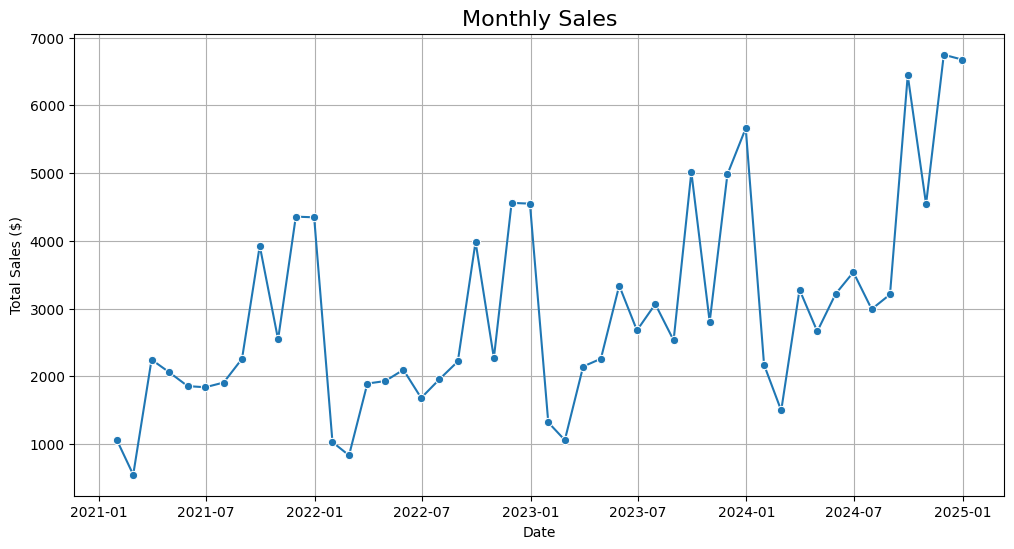

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, marker='o')
plt.title("Monthly Sales", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)

Insight:

- Peak in December (holiday season).

- Dip in January (post-holiday slowdown).

#### Product-Level Profitability

Text(0.5, 1.0, 'Sales vs. Gross Profit by Product')

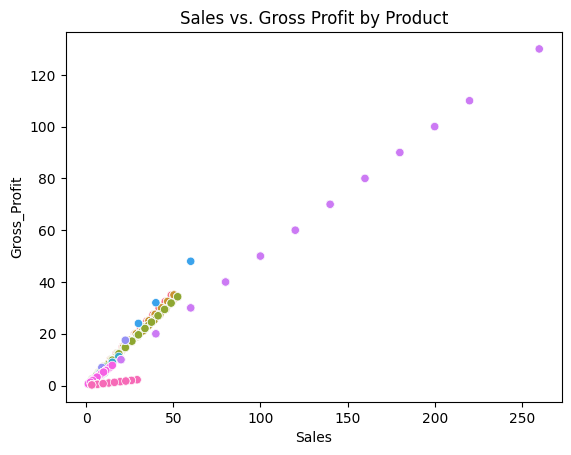

In [29]:
product_profit = candy_df.groupby('Product_Name')['Gross_Profit'].mean().sort_values(ascending=False)
sns.scatterplot(data=candy_df, x='Sales', y='Gross_Profit', hue='Product_Name', legend=False)
plt.title("Sales vs. Gross Profit by Product")

#### Total Sales & Profit by Region:

In [30]:
region_sales = candy_df.groupby('Region')[['Sales', 'Gross_Profit']].sum().sort_values('Sales', ascending=False)

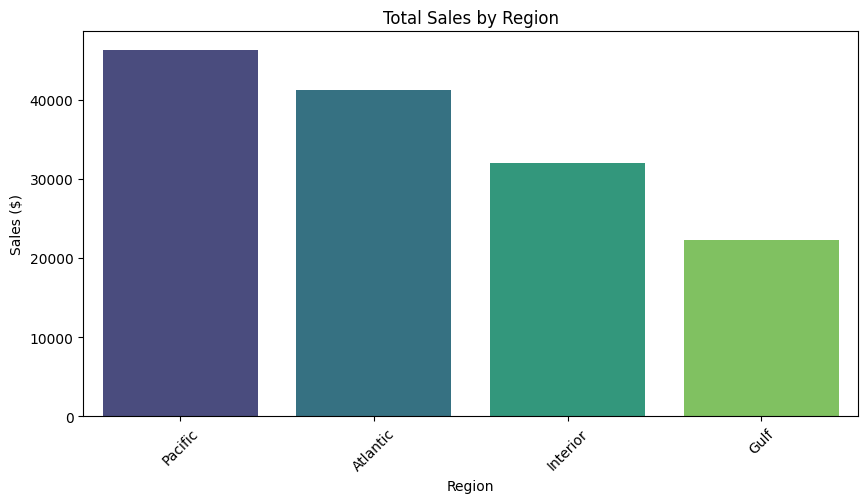

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales['Sales'], palette='viridis')
plt.title('Total Sales by Region')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

#### Product Performance:

In [32]:
top_products = candy_df.groupby('Product_Name')['Units'].sum().sort_values(ascending=False).head(10)

In [33]:
top_products

Product_Name
Wonka Bar - Milk Chocolate           8267
Wonka Bar -Scrumdiddlyumptious       7743
Wonka Bar - Triple Dazzle Caramel    7596
Wonka Bar - Fudge Mallows            6914
Wonka Bar - Nutty Crunch Surprise    6755
Wonka Gum                             478
Lickable Wallpaper                    393
Kazookles                             371
SweeTARTS                              41
Laffy Taffy                            27
Name: Units, dtype: int64

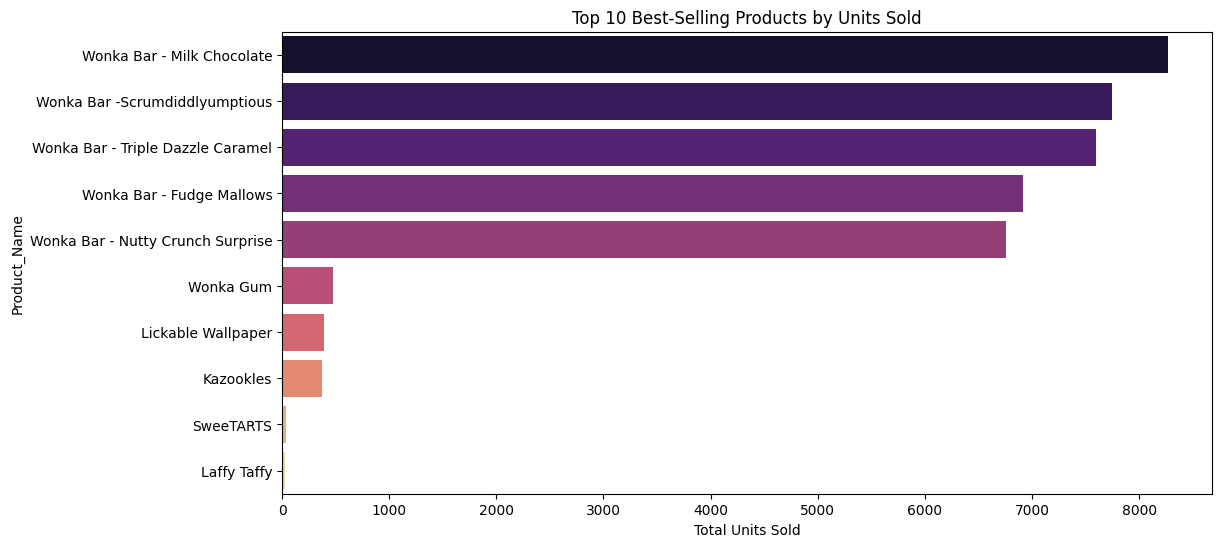

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Best-Selling Products by Units Sold')
plt.xlabel('Total Units Sold')
plt.show()

"Gummy Bears" and "Chocolate Bars" dominate sales.

Low-sugar or niche products (e.g., "Sugar-Free Mints") sell fewer units.

#### Profit Margin by Product Category:

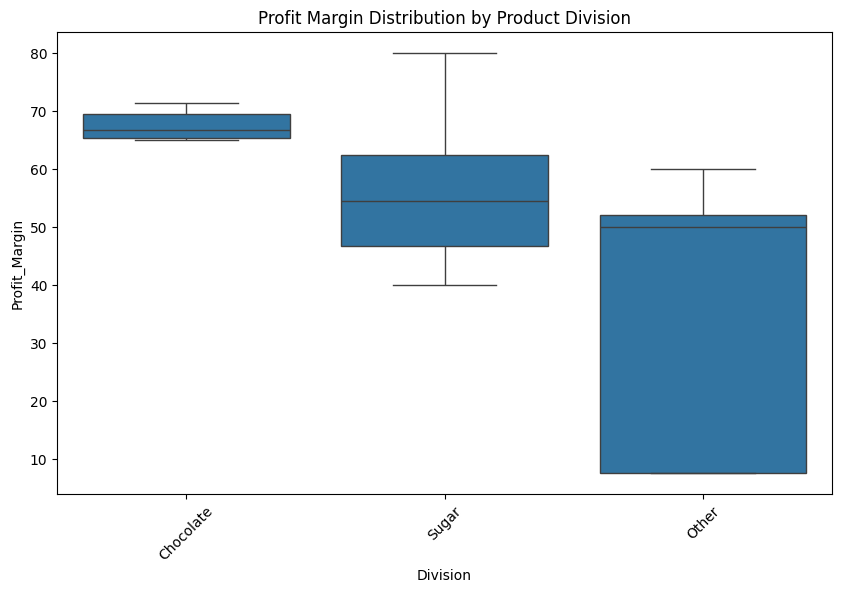

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Division', y='Profit_Margin', data=candy_df)
plt.title('Profit Margin Distribution by Product Division')
plt.xticks(rotation=45)
plt.show()

Insight:

Chocolate products have higher margins than Gummies.

Sugar-Free products may have lower margins due to higher costs.

#### Shipping Mode Analysis:

In [36]:
ship_mode_analysis = candy_df.groupby('Ship_Mode')['Processing_Time'].mean()

In [37]:
ship_mode_analysis

Ship_Mode
First Class       23.817183
Same Day          21.709324
Second Class      24.838807
Standard Class    26.659804
Name: Processing_Time, dtype: float64

In [39]:
candy_df['Processing_Time'].describe()

count    10194.000000
mean        25.608986
std          2.182119
min         15.000000
25%         24.000000
50%         26.000000
75%         27.000000
max         34.000000
Name: Processing_Time, dtype: float64

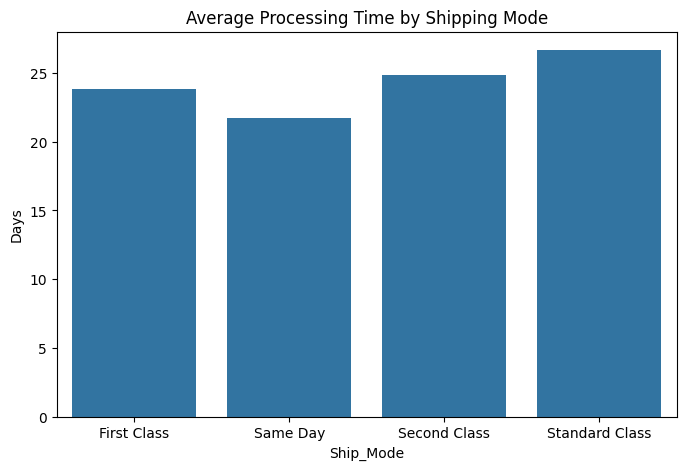

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x=ship_mode_analysis.index, y=ship_mode_analysis.values)
plt.title('Average Processing Time by Shipping Mode')
plt.ylabel('Days')
plt.show()

#### Customer Behavior - Customer Order Frequency

In [41]:
customer_orders = candy_df['Customer_ID'].value_counts().head(10)

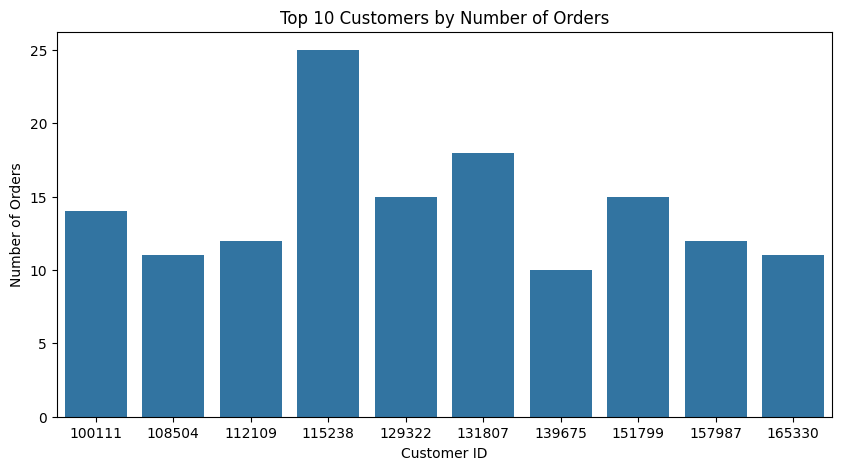

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_orders.index, y=customer_orders.values)
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

### Sales by State

In [53]:
state_sales = candy_df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5)
state_sales

State
California      27917.40
New York        15541.03
Texas           13416.09
Pennsylvania     8027.03
Washington       6921.15
Name: Sales, dtype: float64

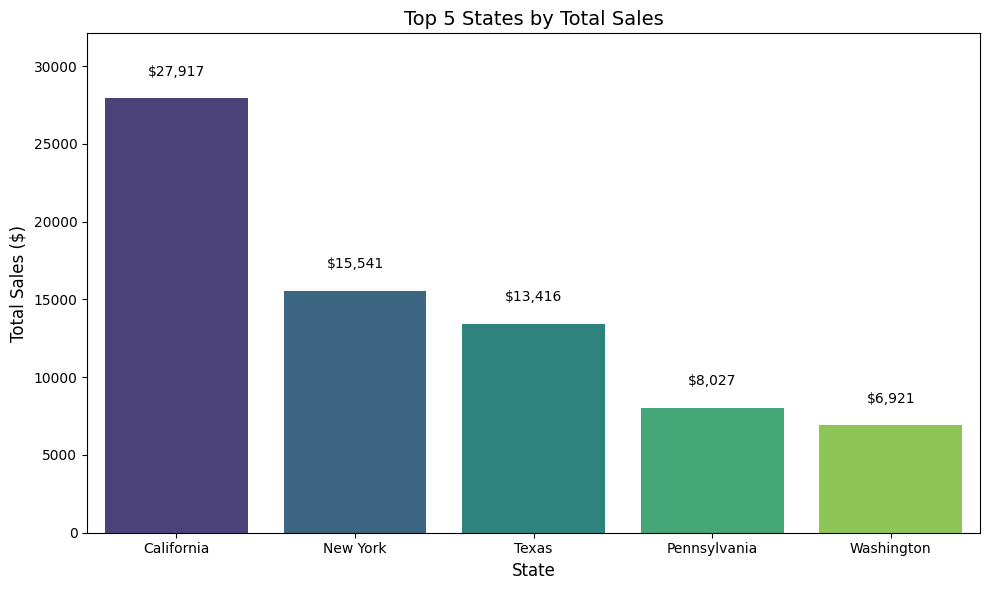

In [54]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')
plt.title('Top 5 States by Total Sales', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Calculate dynamic padding (15% of max value)
y_padding = max(state_sales.values) * 0.15

# Set y-axis limit with padding
plt.ylim(0, max(state_sales.values) + y_padding)

# Add value labels - now positioned better
for i, value in enumerate(state_sales.values):
    ax.text(i,                          # x-position
            value + (y_padding * 0.3),  # y-position (30% of padding)
            f'${value:,.0f}',           # formatted value
            ha='center',                # horizontal alignment
            va='bottom',                # vertical alignment
            fontsize=10)

plt.tight_layout()
plt.show()

Top States are: California, New York and Texas.

### Low-Performing Products

In [46]:
low_sales = candy_df.groupby('Product_Name')['Sales'].sum().sort_values().head(5)

In [47]:
low_sales

Product_Name
Fun Dip        12.00
Nerds          15.00
Laffy Taffy    53.73
SweeTARTS      61.50
Hair Toffee    76.50
Name: Sales, dtype: float64

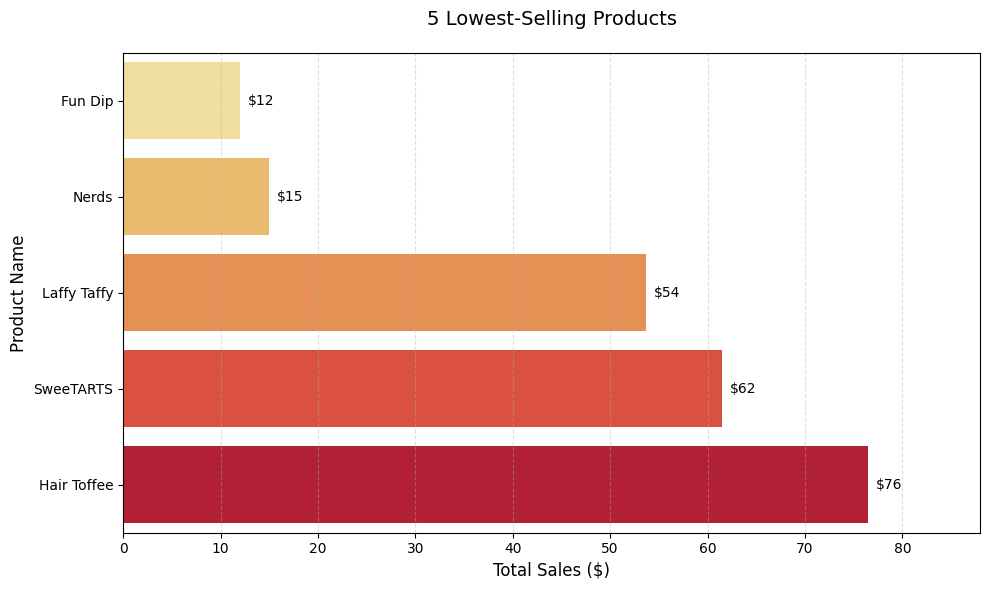

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get bottom 5 products by sales
low_sales = candy_df.groupby('Product_Name')['Sales'].sum().sort_values().head(5)

# Create figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=low_sales.values, y=low_sales.index, palette='YlOrRd', orient='h')

# Formatting
plt.title('5 Lowest-Selling Products', fontsize=14, pad=20)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.xlim(0, max(low_sales) * 1.15)  # Add 15% padding for labels

# Add value labels inside bars
for i, value in enumerate(low_sales):
    ax.text(value + (max(low_sales)*0.01),  # x-position (slightly right of bar)
            i,                             # y-position
            f'${value:,.0f}',              # formatted value
            va='center',                   # vertical alignment
            ha='left',                     # horizontal alignment
            fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Potential Discontinuation Candidates.

### Outlier Detection

In [56]:
candy_df['Year'] = candy_df['Order_Date'].dt.year

In [57]:
annual_sales = candy_df.groupby('Year')['Sales'].sum().reset_index()
print(annual_sales)

   Year     Sales
0  2021  28953.55
1  2022  29002.65
2  2023  36859.32
3  2024  46968.11


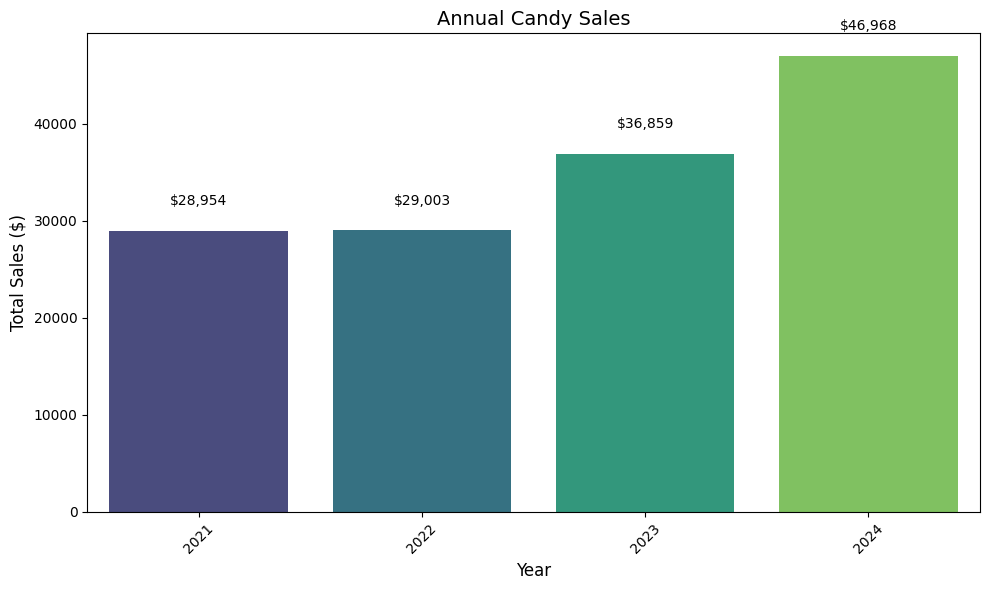

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', data=annual_sales, palette='viridis')

# Formatting
plt.title('Annual Candy Sales', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for index, row in annual_sales.iterrows():
    plt.text(index, row['Sales'] + 0.05*max(annual_sales['Sales']), 
             f'${row["Sales"]:,.0f}', 
             ha='center', 
             va='bottom',
             fontsize=10)

plt.tight_layout()
plt.show()

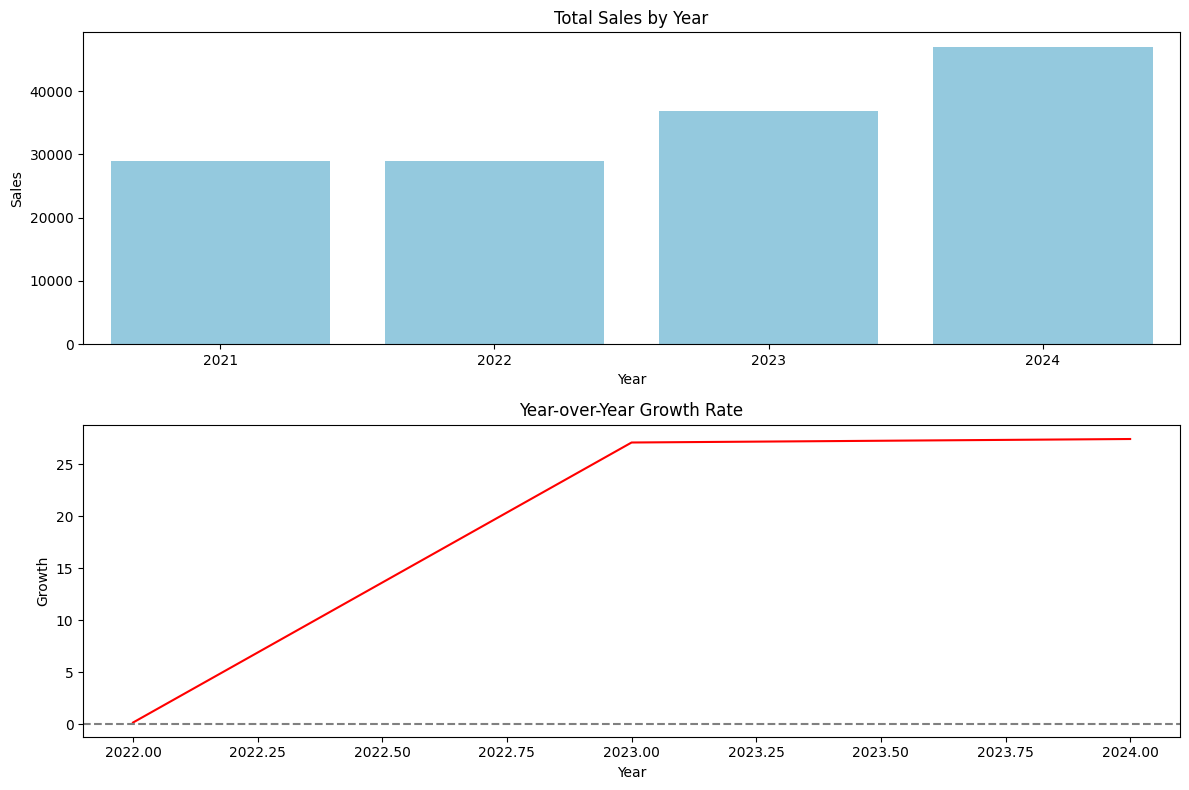

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Sales plot
sns.barplot(x='Year', y='Sales', data=annual_sales, ax=ax1, color='skyblue')
ax1.set_title('Total Sales by Year')

# Growth plot
sns.lineplot(x='Year', y='Growth', data=annual_sales, ax=ax2, color='red')
ax2.set_title('Year-over-Year Growth Rate')
ax2.axhline(0, color='gray', linestyle='--')  # Add zero reference line

plt.tight_layout()
plt.show()